In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("./games_2022 - games_2022.csv")

df

In [5]:
df.info()
df.describe()
df.isnull().sum()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10438 entries, 0 to 10437
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_id              10438 non-null  object 
 1   game_date            10438 non-null  object 
 2   team                 10438 non-null  object 
 3   FGA_2                10438 non-null  int64  
 4   FGM_2                10438 non-null  int64  
 5   FGA_3                10438 non-null  int64  
 6   FGM_3                10438 non-null  int64  
 7   FTA                  10438 non-null  int64  
 8   FTM                  10438 non-null  int64  
 9   AST                  10438 non-null  int64  
 10  BLK                  10438 non-null  int64  
 11  STL                  10438 non-null  int64  
 12  TOV                  10438 non-null  int64  
 13  TOV_team             10438 non-null  int64  
 14  DREB                 10438 non-null  int64  
 15  OREB                 10438 non-null 

game_id                    0
game_date                  0
team                       0
FGA_2                      0
FGM_2                      0
FGA_3                      0
FGM_3                      0
FTA                        0
FTM                        0
AST                        0
BLK                        0
STL                        0
TOV                        0
TOV_team                   0
DREB                       0
OREB                       0
F_tech                     0
F_personal                 0
team_score                 0
opponent_team_score        0
largest_lead               6
notD1_incomplete           0
OT_length_min_tot      10000
rest_days                661
attendance              1462
tz_dif_H_E               900
prev_game_dist          1147
home_away                  0
home_away_NS               0
travel_dist              741
dtype: int64

## =================================================================
## 승률 구하기

In [8]:
df['result'] = '0'
df.loc[df['team_score'] > df['opponent_team_score'], 'result'] = '1'
df

,game_id,game_date,team,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,...,notD1_incomplete,OT_length_min_tot,rest_days,attendance,tz_dif_H_E,prev_game_dist,home_away,home_away_NS,travel_dist,result
0,game_2022_2011,2021-12-30,georgia_lady_bulldogs,50,22,11,5,6,3,14,...,False,NaN,9.0,3241.0,0.0,0.0,home,1,0.0,0
1,game_2022_2011,2021-12-30,lsu_tigers,50,24,11,4,15,8,15,...,False,NaN,3.0,3241.0,0.0,824.0,away,-1,824.0,1
2,game_2022_2012,2021-12-30,missouri_tigers,43,18,15,7,16,13,10,...,False,5.0,8.0,6139.0,0.0,371.0,home,1,0.0,1
3,game_2022_2012,2021-12-30,south_carolina_gamecocks,55,23,21,6,9,5,15,...,False,5.0,9.0,6139.0,0.0,1154.0,away,-1,1154.0,0
4,game_2022_2013,2021-12-30,tennessee_lady_volunteers,41,20,15,4,15,10,16,...,False,NaN,3.0,8124.0,0.0,0.0,home,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,game_2022_4795,2022-03-01,xavier_musketeers,44,19,12,2,12,9,15,...,False,NaN,2.0,156.0,0.0,0.0,home,1,0.0,0
10434,game_2022_4968,2022-03-04,harvard_crimson,30,19,39,15,10,2,20,...,False,NaN,13.0,373.0,0.0,378.0,away,-1,173.0,1
10435,game_2022_4968,2022-03-04,dartmouth_big_green,32,15,26,6,7,4,7,...,False,NaN,6.0,373.0,0.0,479.0,home,1,0.0,0
10436,game_2022_5067,2022-03-06,harvard_crimson,38,13,35,6,10,9,11,...,False,NaN,2.0,757.0,0.0,173.0,home,1,0.0,0


In [10]:
df['game_count'] = df.groupby('team')['team'].transform('count')
df['wins'] = df.groupby('team')['result'].transform(lambda x: (x=='1').sum())

df

,game_id,game_date,team,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,...,rest_days,attendance,tz_dif_H_E,prev_game_dist,home_away,home_away_NS,travel_dist,result,game_count,wins
0,game_2022_2011,2021-12-30,georgia_lady_bulldogs,50,22,11,5,6,3,14,...,9.0,3241.0,0.0,0.0,home,1,0.0,0,28,19
1,game_2022_2011,2021-12-30,lsu_tigers,50,24,11,4,15,8,15,...,3.0,3241.0,0.0,824.0,away,-1,824.0,1,28,23
2,game_2022_2012,2021-12-30,missouri_tigers,43,18,15,7,16,13,10,...,8.0,6139.0,0.0,371.0,home,1,0.0,1,30,18
3,game_2022_2012,2021-12-30,south_carolina_gamecocks,55,23,21,6,9,5,15,...,9.0,6139.0,0.0,1154.0,away,-1,1154.0,0,31,29
4,game_2022_2013,2021-12-30,tennessee_lady_volunteers,41,20,15,4,15,10,16,...,3.0,8124.0,0.0,0.0,home,1,0.0,1,31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,game_2022_4795,2022-03-01,xavier_musketeers,44,19,12,2,12,9,15,...,2.0,156.0,0.0,0.0,home,1,0.0,0,30,9
10434,game_2022_4968,2022-03-04,harvard_crimson,30,19,39,15,10,2,20,...,13.0,373.0,0.0,378.0,away,-1,173.0,1,27,13
10435,game_2022_4968,2022-03-04,dartmouth_big_green,32,15,26,6,7,4,7,...,6.0,373.0,0.0,479.0,home,1,0.0,0,26,3
10436,game_2022_5067,2022-03-06,harvard_crimson,38,13,35,6,10,9,11,...,2.0,757.0,0.0,173.0,home,1,0.0,0,27,13


In [12]:
df['win_per']=df['wins']/df['game_count']
df

,game_id,game_date,team,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,...,attendance,tz_dif_H_E,prev_game_dist,home_away,home_away_NS,travel_dist,result,game_count,wins,win_per
0,game_2022_2011,2021-12-30,georgia_lady_bulldogs,50,22,11,5,6,3,14,...,3241.0,0.0,0.0,home,1,0.0,0,28,19,0.678571
1,game_2022_2011,2021-12-30,lsu_tigers,50,24,11,4,15,8,15,...,3241.0,0.0,824.0,away,-1,824.0,1,28,23,0.821429
2,game_2022_2012,2021-12-30,missouri_tigers,43,18,15,7,16,13,10,...,6139.0,0.0,371.0,home,1,0.0,1,30,18,0.600000
3,game_2022_2012,2021-12-30,south_carolina_gamecocks,55,23,21,6,9,5,15,...,6139.0,0.0,1154.0,away,-1,1154.0,0,31,29,0.935484
4,game_2022_2013,2021-12-30,tennessee_lady_volunteers,41,20,15,4,15,10,16,...,8124.0,0.0,0.0,home,1,0.0,1,31,23,0.741935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,game_2022_4795,2022-03-01,xavier_musketeers,44,19,12,2,12,9,15,...,156.0,0.0,0.0,home,1,0.0,0,30,9,0.300000
10434,game_2022_4968,2022-03-04,harvard_crimson,30,19,39,15,10,2,20,...,373.0,0.0,378.0,away,-1,173.0,1,27,13,0.481481
10435,game_2022_4968,2022-03-04,dartmouth_big_green,32,15,26,6,7,4,7,...,373.0,0.0,479.0,home,1,0.0,0,26,3,0.115385
10436,game_2022_5067,2022-03-06,harvard_crimson,38,13,35,6,10,9,11,...,757.0,0.0,173.0,home,1,0.0,0,27,13,0.481481


In [14]:
# 홈 경기 수
home_games = df[df['home_away_NS'] == 1].groupby('team')['game_id'].count().reset_index(name='home_game_count')
home_games = df[df['home_away_NS'] == 1].groupby('team')['game_id'].count().reset_index(name='home_game_count')
home_wins = df[(df['home_away_NS'] == 1) & (df['result'] == 1)].groupby('team')['game_id'].count().reset_index(name='home_wins')


# 원정 경기 수
away_games = df[df['home_away_NS'] == -1].groupby('team')['game_id'].count().reset_index(name='away_game_count')

# 데이터 합치기
df = pd.merge(df,home_games, on='team', how='left').fillna(0)
df = pd.merge(df,away_games, on='team', how='left').fillna(0)

df

,game_id,game_date,team,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,...,prev_game_dist,home_away,home_away_NS,travel_dist,result,game_count,wins,win_per,home_game_count,away_game_count
0,game_2022_2011,2021-12-30,georgia_lady_bulldogs,50,22,11,5,6,3,14,...,0.0,home,1,0.0,0,28,19,0.678571,16.0,9.0
1,game_2022_2011,2021-12-30,lsu_tigers,50,24,11,4,15,8,15,...,824.0,away,-1,824.0,1,28,23,0.821429,16.0,9.0
2,game_2022_2012,2021-12-30,missouri_tigers,43,18,15,7,16,13,10,...,371.0,home,1,0.0,1,30,18,0.600000,15.0,13.0
3,game_2022_2012,2021-12-30,south_carolina_gamecocks,55,23,21,6,9,5,15,...,1154.0,away,-1,1154.0,0,31,29,0.935484,14.0,10.0
4,game_2022_2013,2021-12-30,tennessee_lady_volunteers,41,20,15,4,15,10,16,...,0.0,home,1,0.0,1,31,23,0.741935,16.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,game_2022_4795,2022-03-01,xavier_musketeers,44,19,12,2,12,9,15,...,0.0,home,1,0.0,0,30,9,0.300000,14.0,15.0
10434,game_2022_4968,2022-03-04,harvard_crimson,30,19,39,15,10,2,20,...,378.0,away,-1,173.0,1,27,13,0.481481,10.0,15.0
10435,game_2022_4968,2022-03-04,dartmouth_big_green,32,15,26,6,7,4,7,...,479.0,home,1,0.0,0,26,3,0.115385,11.0,15.0
10436,game_2022_5067,2022-03-06,harvard_crimson,38,13,35,6,10,9,11,...,173.0,home,1,0.0,0,27,13,0.481481,10.0,15.0


## ======================================================================
## Region 항목 추가

In [17]:
region_df=pd.read_csv("./Team Region Groups.csv")
region_df

,team,region
0,alabama_crimson_tide,North
1,alabama_state_lady_hornets,North
2,arkansas_razorbacks,North
3,belmont_bruins,North
4,charleston_cougars,North
...,...,...
134,ut_arlington_mavericks,West
135,utah_utes,West
136,utah_valley_wolverines,West
137,washington_state_cougars,West


In [19]:
df=pd.merge(df,region_df, on='team', how='left')
df.head()

,game_id,game_date,team,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,...,home_away,home_away_NS,travel_dist,result,game_count,wins,win_per,home_game_count,away_game_count,region
0,game_2022_2011,2021-12-30,georgia_lady_bulldogs,50,22,11,5,6,3,14,...,home,1,0.0,0,28,19,0.678571,16.0,9.0,North
1,game_2022_2011,2021-12-30,lsu_tigers,50,24,11,4,15,8,15,...,away,-1,824.0,1,28,23,0.821429,16.0,9.0,North
2,game_2022_2012,2021-12-30,missouri_tigers,43,18,15,7,16,13,10,...,home,1,0.0,1,30,18,0.600000,15.0,13.0,South
3,game_2022_2012,2021-12-30,south_carolina_gamecocks,55,23,21,6,9,5,15,...,away,-1,1154.0,0,31,29,0.935484,14.0,10.0,North
4,game_2022_2013,2021-12-30,tennessee_lady_volunteers,41,20,15,4,15,10,16,...,home,1,0.0,1,31,23,0.741935,16.0,11.0,North


In [21]:
regions = df['region'].unique()
for region in regions:
    region_df = df[df['region'] == region]
    # Save the filtered DataFrame to a CSV file named after the region
    region_df.to_csv(f"{region}.csv", index=False)

## ======================================================
## Calculations

In [24]:
df['travel_dist'] = df['travel_dist'].fillna(0)
df['OT_length_min_tot'] = df['OT_length_min_tot'].fillna(0)

In [26]:
df['field_goal_per']=df['FGM_2']/df['FGA_2']
df['three_point_per']=df['FGM_3']/df['FGA_3']
df['free_throw_per']=df['FTM']/df['FTA']

In [28]:
df['eFG%']=df['FGM_2']/df['FGA_2']

In [30]:
df['FGA']=df['FGA_2']+df['FGA_3']

df['pos']=(df['FGA']+df['TOV']+(0.44*df['FTA'])-df['OREB'])*0.96

In [32]:
df['REB']=df['DREB']+df['OREB']

df.drop('DREB',axis=1,inplace=True)
df.drop('OREB',axis=1,inplace=True)
df.drop('notD1_incomplete',axis=1,inplace=True)

In [34]:
df.drop('FGM_2',axis=1,inplace=True)
df.drop('FGA_2',axis=1,inplace=True)
df.drop('FGM_3',axis=1,inplace=True)
df.drop('FGA_3',axis=1,inplace=True)
df.drop('FTM',axis=1,inplace=True)
df.drop('FTA',axis=1,inplace=True)



df.head()

,game_id,game_date,team,AST,BLK,STL,TOV,TOV_team,F_tech,F_personal,...,home_game_count,away_game_count,region,field_goal_per,three_point_per,free_throw_per,eFG%,FGA,pos,REB
0,game_2022_2011,2021-12-30,georgia_lady_bulldogs,14,7,7,18,0,0,18,...,16.0,9.0,North,0.440000,0.454545,0.500000,0.440000,61,67.8144,36
1,game_2022_2011,2021-12-30,lsu_tigers,15,2,15,14,2,0,7,...,16.0,9.0,North,0.480000,0.363636,0.533333,0.480000,61,67.7760,36
2,game_2022_2012,2021-12-30,missouri_tigers,10,1,4,8,1,0,11,...,15.0,13.0,South,0.418605,0.466667,0.812500,0.418605,58,64.3584,37
3,game_2022_2012,2021-12-30,south_carolina_gamecocks,15,8,3,8,0,0,15,...,14.0,10.0,North,0.418182,0.285714,0.555556,0.418182,76,65.2416,47
4,game_2022_2013,2021-12-30,tennessee_lady_volunteers,16,8,5,15,1,0,13,...,16.0,11.0,North,0.487805,0.266667,0.666667,0.487805,56,62.9760,46


In [36]:
'''
df['game_date'] = pd.to_datetime(df['game_date'], errors='coerce')

for df in [df]:
    df['year'] = df['game_date'].dt.year
    df['month'] = df['game_date'].dt.month
    df['day'] = df['game_date'].dt.day
    df['dayofweek'] = df['game_date'].dt.dayofweek

df.drop('game_date', axis=1, inplace=True)
df
'''

"\ndf['game_date'] = pd.to_datetime(df['game_date'], errors='coerce')\n\nfor df in [df]:\n    df['year'] = df['game_date'].dt.year\n    df['month'] = df['game_date'].dt.month\n    df['day'] = df['game_date'].dt.day\n    df['dayofweek'] = df['game_date'].dt.dayofweek\n\ndf.drop('game_date', axis=1, inplace=True)\ndf\n"

## ===============================================================
## 시각화

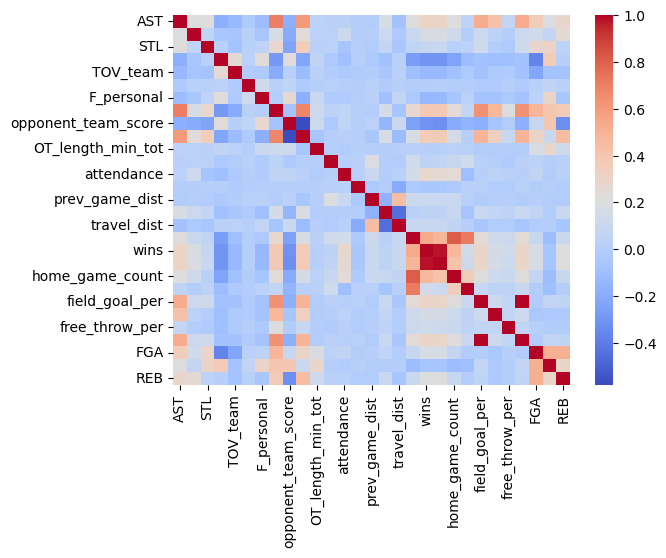

In [39]:
game_features = df.describe().columns
corr_df = df[game_features].corr()
corr_df
ax = sns.heatmap(corr_df, cmap = "coolwarm")

1에 가까울수록 정비례 / -1에 가까울수록 반비례 / 0이면 상관관계 X

#### 승률(win_per)과 관계
- possesion과 약한 (-0.2)
- game_count와 약한 (+0.4)
- tz_dif_H_E와 약한 (-0.2)
- turnover (-0.4)
- F_personal (-0.3)
- turnover_team (-0.3)

#### 양의 상관관계 (빨간색)
- team_score & largest_lead
  - 점수가 높을수록 경기 중 리드 폭도 커짐
- REB & FGA
  - 리바운드가 많을수록 슛 시도(FGA) 증가
- field_goal_per & team_score
  - 필드골 성공률이 높을수록 팀 점수도 높아짐 (당연)
- AST & team_score
  - 골 시도가 많아서 team score도 높은듯

#### 음의 상관관계 (파란색)
- opponent_team_score & largest_lead
  - 상대팀 점수가 높으면 리드 폭이 줄거나 없어짐 (역시나 당연)
- travel_dist & field_goal_per
  - 이동 거리 증가 = 선수들의 피로도로 인해 필드골 성공률이 낮아질 가능성
- rest_days & TOV
  - 휴식일수 증가 = 턴오버 감소
  - 하지만 골 성공률 등은 휴식일이 증가할수록 감소함

#### 항목 삭제하기
- largest_lead = (opponent_)team_score와 관계
- wins = win_per로 보여짐

## ==========================================================
## 평균 계산: df_mean

In [46]:
df_mean=df

#df_mean.drop('largest_lead',axis=1,inplace=True)
#df_mean.drop('wins',axis=1,inplace=True)

df_mean = df_mean.groupby('team').mean(numeric_only=True).reset_index()
df_mean

,team,AST,BLK,STL,TOV,TOV_team,F_tech,F_personal,team_score,opponent_team_score,...,win_per,home_game_count,away_game_count,field_goal_per,three_point_per,free_throw_per,eFG%,FGA,pos,REB
0,abilene_christian_wildcats,16.100000,1.933333,7.666667,14.333333,0.600000,0.266667,15.966667,73.866667,66.600000,...,0.566667,12.0,11.0,0.499220,0.353175,0.763628,0.499220,59.100000,66.897920,34.033333
1,academy_of_art_urban_knights,10.500000,5.500000,9.000000,14.500000,1.500000,0.000000,16.500000,50.000000,65.500000,...,0.000000,0.0,0.0,0.432927,0.160774,0.472222,0.432927,63.000000,67.315200,35.500000
2,agnes_scott_college_scotties,5.000000,2.000000,4.500000,38.000000,1.500000,0.000000,11.500000,25.000000,109.500000,...,0.000000,0.0,0.0,0.209122,0.174825,0.472222,0.209122,50.500000,78.105600,30.500000
3,air_force_falcons,12.806452,2.064516,11.161290,13.161290,1.129032,0.096774,17.774194,62.064516,58.161290,...,0.580645,13.0,15.0,0.415959,0.285179,0.754856,0.415959,61.193548,65.398916,34.225806
4,akron_zips,14.392857,3.535714,7.142857,14.928571,0.500000,0.142857,15.571429,67.428571,66.714286,...,0.607143,11.0,14.0,0.483366,0.317646,0.704481,0.483366,58.000000,67.371429,35.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,xavier_la_gold_rush,8.000000,1.500000,8.000000,25.500000,0.500000,0.500000,22.500000,42.500000,69.500000,...,0.000000,0.0,0.0,0.276316,0.244444,0.732323,0.276316,50.000000,67.507200,35.000000
560,xavier_musketeers,12.866667,2.966667,7.500000,16.366667,0.533333,0.066667,16.600000,62.333333,72.833333,...,0.300000,14.0,15.0,0.419886,0.261187,0.734109,0.419886,59.233333,68.523520,36.300000
561,yale_bulldogs,13.666667,3.703704,7.037037,18.555556,1.296296,0.000000,16.592593,58.518519,56.814815,...,0.592593,10.0,16.0,0.424179,0.307496,0.657722,0.424179,56.481481,66.414933,38.851852
562,young_harris_college_mountain_lions,11.000000,1.000000,3.000000,18.000000,0.000000,0.000000,17.000000,58.000000,91.000000,...,0.000000,0.0,0.0,0.450000,0.357143,0.583333,0.450000,54.000000,70.348800,31.000000


## ==============================================================================
## 시각화

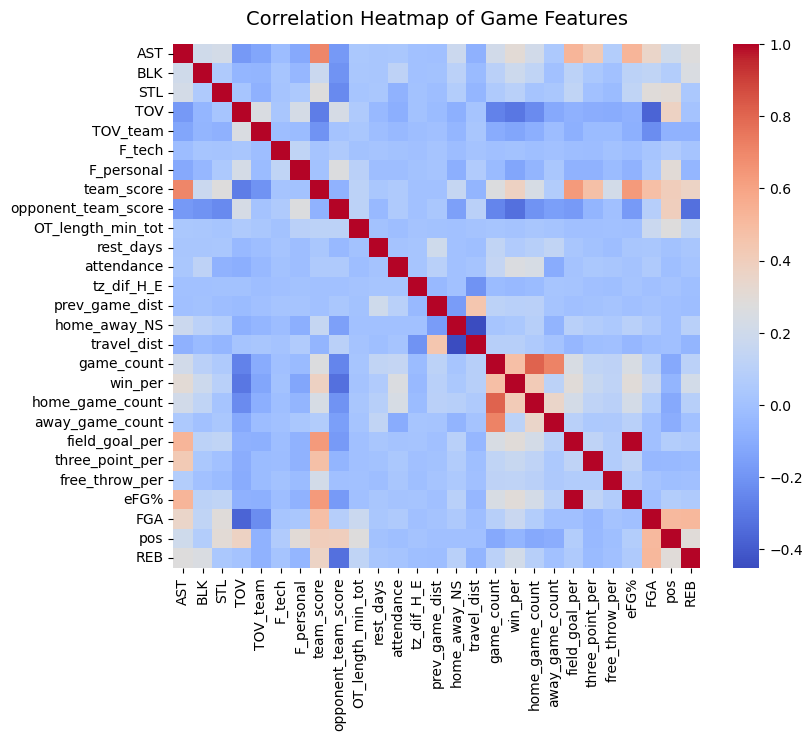

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

game_features = df_mean.describe().columns
corr_df = df[game_features].corr()

# Create heatmap
plt.figure(figsize=(8.5, 6.8))  # Adjust figure size if needed
ax = sns.heatmap(corr_df, cmap="coolwarm", annot=False, fmt=".2f")  # `annot=True` adds correlation values

# Add title with spacing
plt.title("Correlation Heatmap of Game Features", pad=14, fontsize=14)

plt.show()


,AST,BLK,STL,TOV,TOV_team,F_tech,F_personal,team_score,opponent_team_score,OT_length_min_tot,...,win_per,home_game_count,away_game_count,field_goal_per,three_point_per,free_throw_per,eFG%,FGA,pos,REB
AST,1.000000,0.201067,0.222070,-0.184096,-0.131235,-0.023936,-0.111925,0.703092,-0.184098,3.802302e-02,...,0.304005,0.208851,0.045075,0.525697,0.422536,0.072905,0.525697,0.352954,0.198807,0.279861
BLK,0.201067,1.000000,0.056058,-0.059100,-0.061486,0.020016,-0.052391,0.172559,-0.204587,3.101641e-02,...,0.184759,0.130025,0.000956,0.111763,0.036886,0.000589,0.111763,0.132317,0.073950,0.254327
STL,0.222070,0.056058,1.000000,0.020652,-0.077395,0.016003,0.046308,0.274416,-0.237055,2.371773e-02,...,0.096349,0.016861,0.035241,0.127075,-0.001701,-0.027209,0.127075,0.290791,0.303647,0.036194
TOV,-0.184096,-0.059100,0.020652,1.000000,0.256303,0.027527,0.226912,-0.283583,0.229817,5.767263e-02,...,-0.305306,-0.232896,-0.113000,-0.081136,-0.098865,-0.101831,-0.081136,-0.369075,0.372571,0.009291
TOV_team,-0.131235,-0.061486,-0.077395,0.256303,1.000000,-0.017739,-0.026732,-0.205127,0.013117,3.115969e-02,...,-0.132095,-0.090306,-0.023228,-0.083599,-0.029617,-0.028863,-0.083599,-0.228755,-0.076695,-0.074295
F_tech,-0.023936,0.020016,0.016003,0.027527,-0.017739,1.000000,0.127078,0.018624,0.056962,7.082658e-03,...,0.005081,-0.009992,-0.000134,-0.018866,-0.021205,0.005675,-0.018866,0.019201,0.062441,0.015393
F_personal,-0.111925,-0.052391,0.046308,0.226912,-0.026732,0.127078,1.000000,0.002709,0.266827,9.931648e-02,...,-0.128743,-0.065281,0.030983,-0.072520,-0.075963,-0.031130,-0.072520,0.034097,0.298326,-0.057993
team_score,0.703092,0.172559,0.274416,-0.283583,-0.205127,0.018624,0.002709,1.000000,-0.075396,1.146059e-01,...,0.379599,0.237281,0.065056,0.634664,0.474519,0.214160,0.634664,0.482371,0.399708,0.369406
opponent_team_score,-0.184098,-0.204587,-0.237055,0.229817,0.013117,0.056962,0.266827,-0.075396,1.000000,1.146059e-01,...,-0.330112,-0.207521,-0.158059,-0.178182,-0.064000,-0.007235,-0.178182,0.084104,0.395192,-0.329209
OT_length_min_tot,0.038023,0.031016,0.023718,0.057673,0.031160,0.007083,0.099316,0.114606,0.114606,1.000000e+00,...,0.012547,0.027117,0.014724,-0.006763,-0.008208,-0.002786,-0.006763,0.176304,0.279061,0.127404


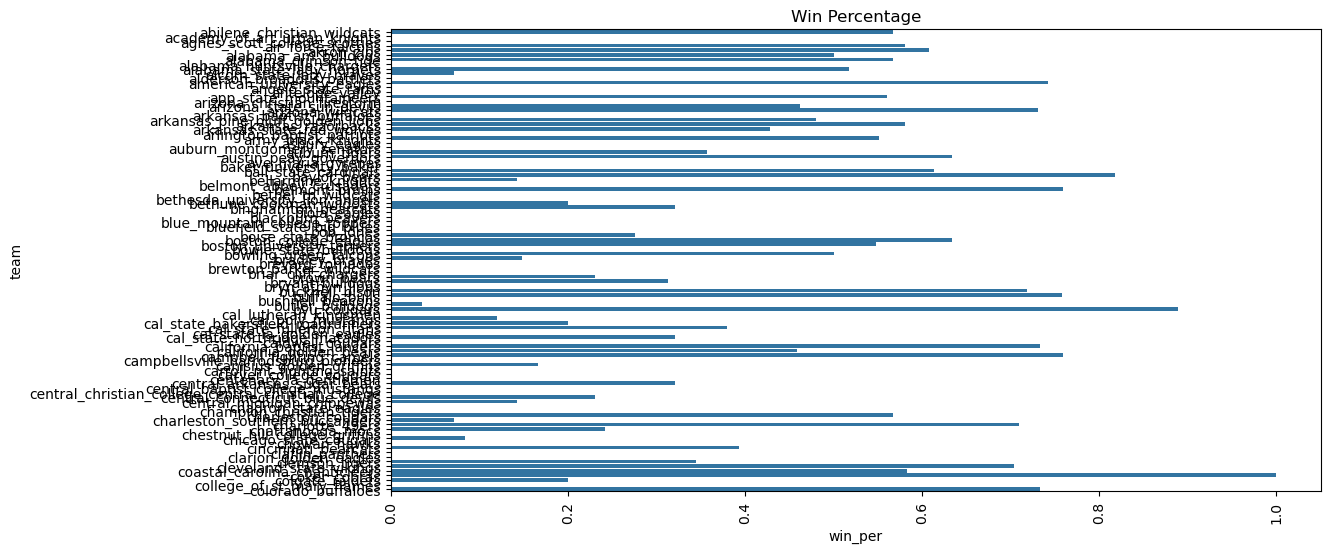

In [643]:
plt.figure(figsize=(12,6))
sns.barplot(x='win_per', y='team', data=df_mean[:100])  # df가 데이터프레임이라고 가정
plt.xticks(rotation=90)  # 팀명이 길 경우 가로로 돌려서 보이게
plt.title('Win Percentage')
plt.show()

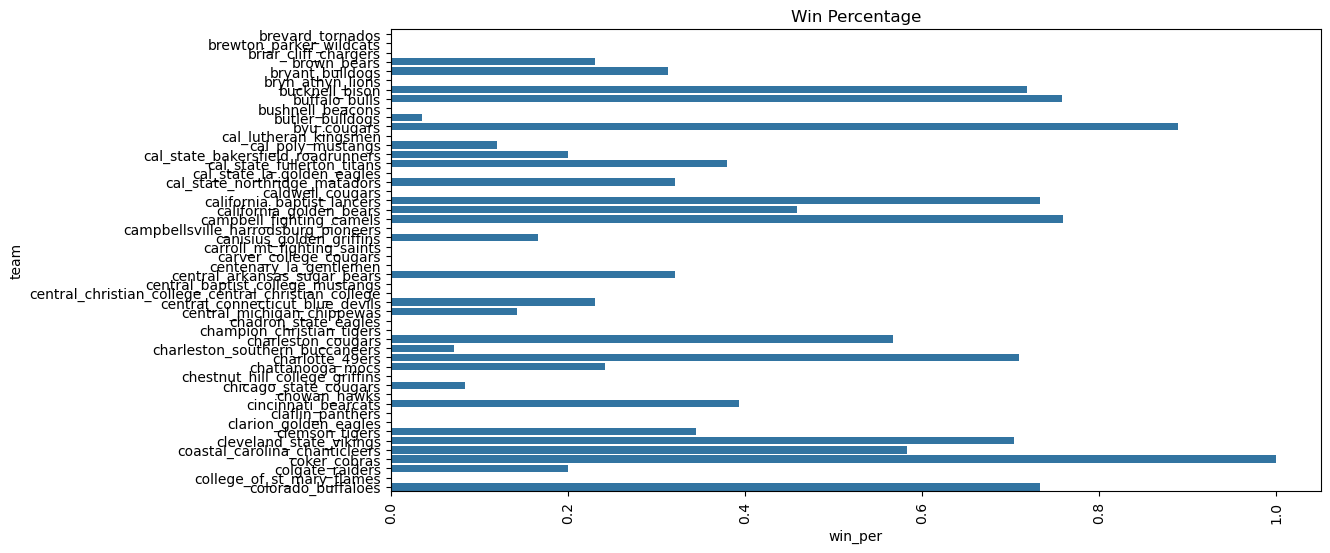

In [645]:
plt.figure(figsize=(12,6))
sns.barplot(x='win_per', y='team', data=df_mean[50:100])  # df가 데이터프레임이라고 가정
plt.xticks(rotation=90)  # 팀명이 길 경우 가로로 돌려서 보이게
plt.title('Win Percentage')
plt.show()

In [647]:
df.to_csv('preprocessed.csv', index=False)

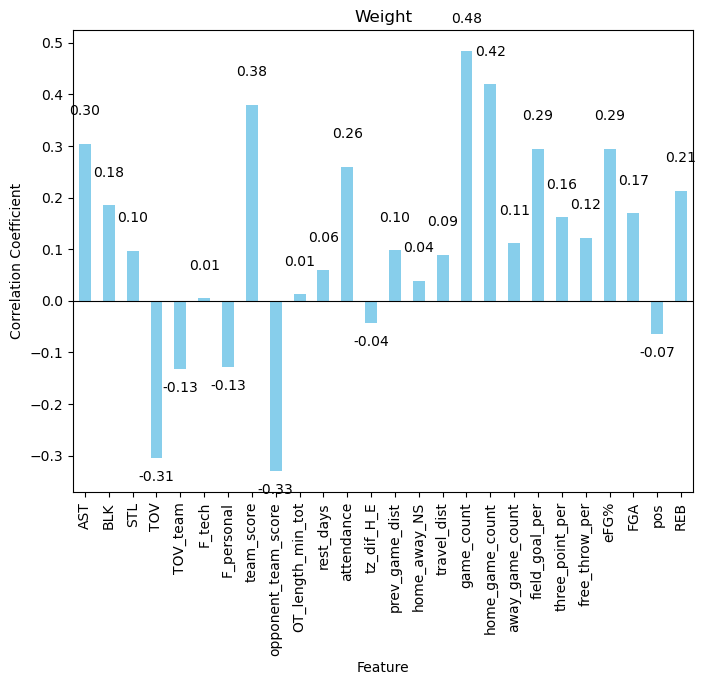

In [85]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

target_feature = 'win_per'
subset_corr = corr_matrix[target_feature].drop(target_feature)

plt.figure(figsize=(8, 6))
ax = subset_corr.plot(kind='bar', color='skyblue')
plt.title("Weight")
plt.xlabel("Feature")
plt.ylabel("Correlation Coefficient")
plt.axhline(0, color='black', linewidth=0.8)

# Annotate
for i, value in enumerate(subset_corr):
    label = f"{value:.2f}"
    y_pos = value + 0.05 if value >= 0 else value - 0.05
    ax.text(i, y_pos, label, ha='center', va='bottom', fontsize=10)

plt.show()